# Lab 2 - Scale Invariant Feature Transform

In [12]:
import math
import sys

%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

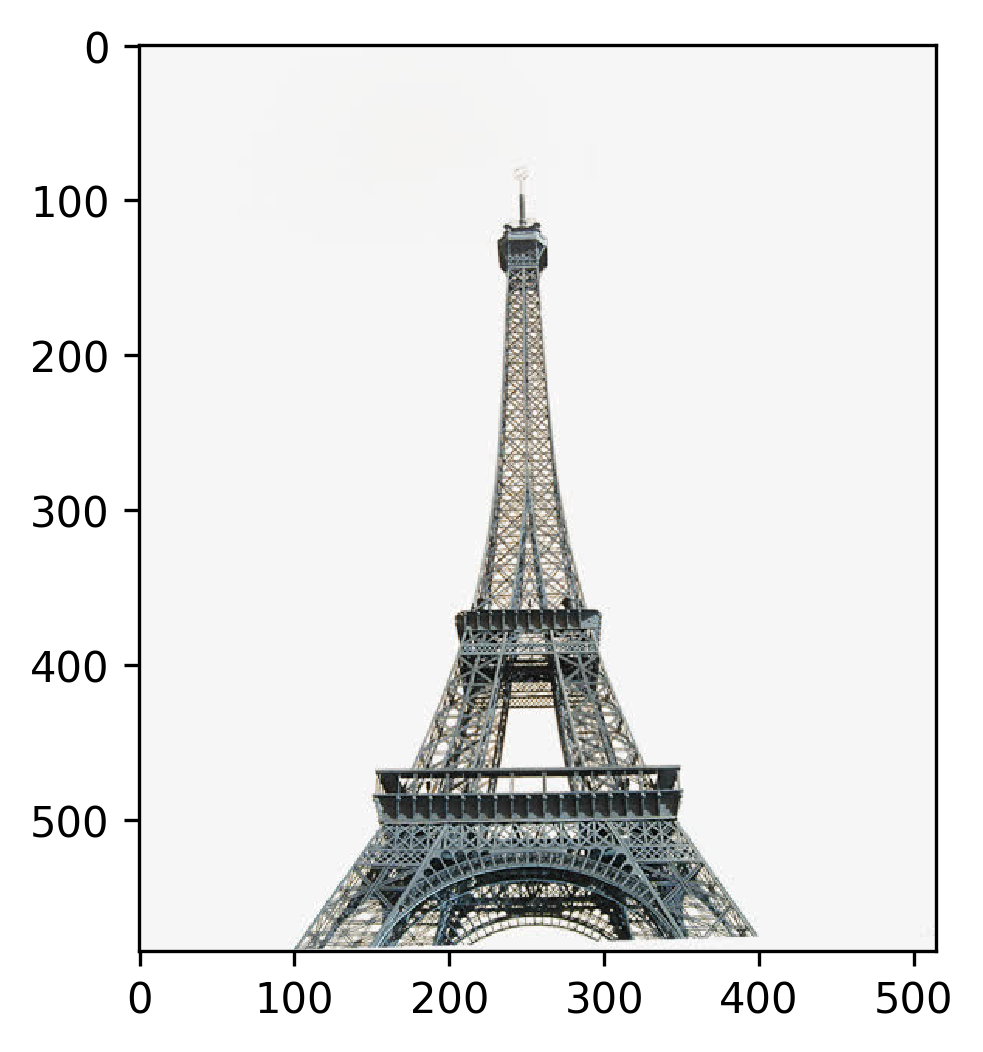

In [13]:
img_eiffel = cv2.imread("img/Eiffel_Tower.jpg")
plt.imshow(img_eiffel)

In [14]:
class SiftDetector():
    def __init__(self, norm="L2", params=None):
        self.detector=self.get_detector(params)
        self.norm=norm

    def get_detector(self, params):
        if params is None:
            params={}
            params["n_features"]=0
            params["n_octave_layers"]=3
            params["contrast_threshold"]=0.04
            params["edge_threshold"]=10
            params["sigma"]=1.6

        detector = cv2.xfeatures2d.SIFT_create(
                nfeatures=params["n_features"],
                nOctaveLayers=params["n_octave_layers"],
                contrastThreshold=params["contrast_threshold"],
                edgeThreshold=params["edge_threshold"],
                sigma=params["sigma"])

        return detector

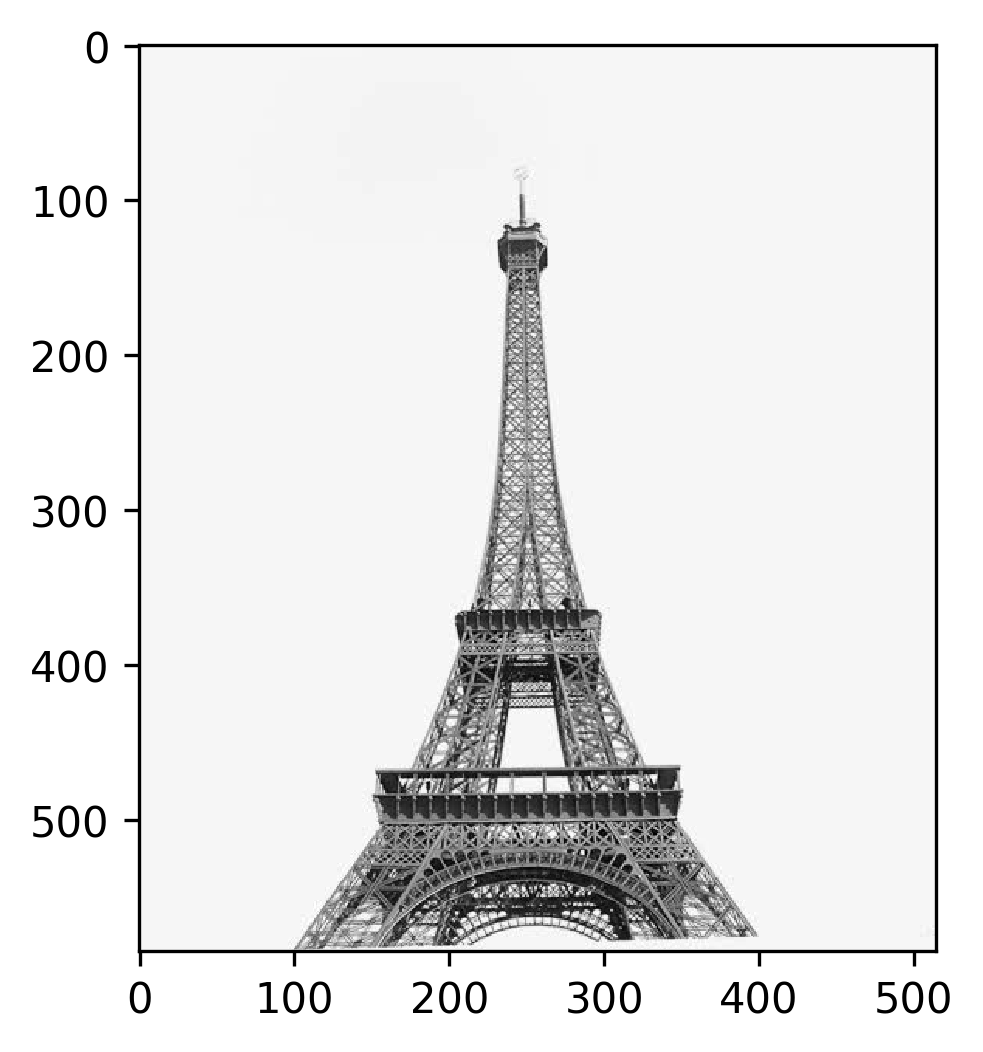

In [15]:
# convert image to grayscale
img_eiffel_gray = cv2.cvtColor(img_eiffel, cv2.COLOR_BGR2GRAY)
plt.imshow(img_eiffel_gray, cmap='gray', vmin=0, vmax=255)

To reduce the amount of features by about a quarter, we will first see how many features the standard SIFT detetor produces and then limit n_features to approximately 1/4 of that.

In [16]:
orig_sift = SiftDetector()
kp = orig_sift.detector.detect(img_eiffel_gray, None)
print(len(kp), "features detected by default")

959 features detected by default


In [17]:
params={}
params["n_octave_layers"]=3
params["contrast_threshold"]=0.15
params["edge_threshold"]=10
params["sigma"]=1.6
params["n_features"]=0

sift = SiftDetector(params=params)

## Task 1

417 features detected


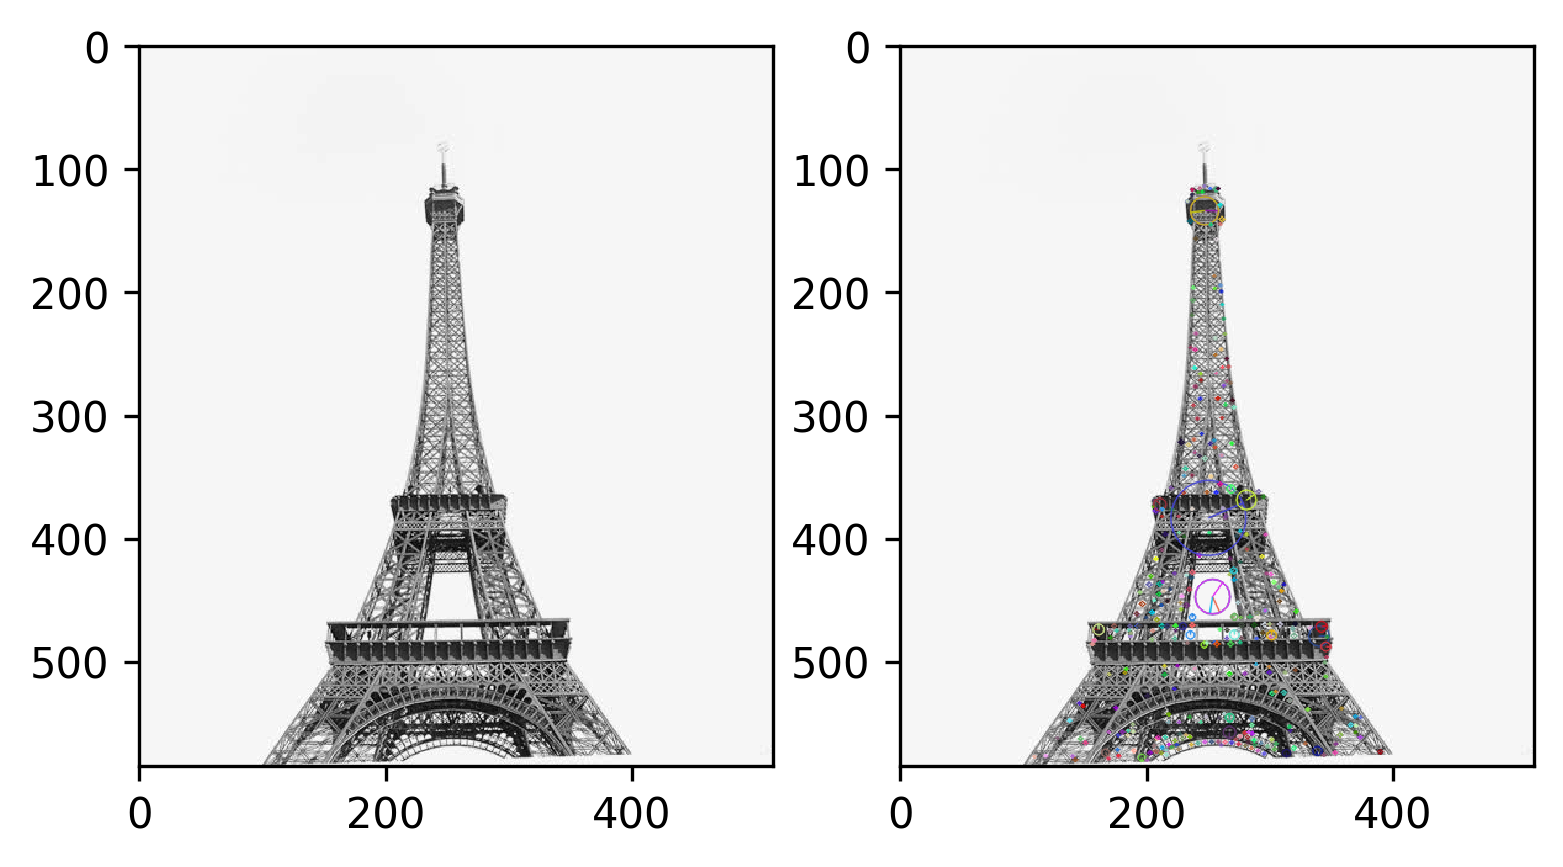

In [19]:
kp_eiffel_orig, desc_eiffel_orig = sift.detector.detectAndCompute(img_eiffel_gray, None)
fig, axes = plt.subplots(1,2)
axes[0].imshow(img_eiffel_gray, cmap='gray', vmin=0, vmax=255)
img_eiffel_keypoints = cv2.drawKeypoints(img_eiffel_gray, kp_eiffel_orig, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
axes[1].imshow(img_eiffel_keypoints)

cv2.imwrite("task1_keypoints.jpg", img_eiffel_keypoints)

print(len(kp_eiffel_orig), "features detected")

## Task 2

387 features detected


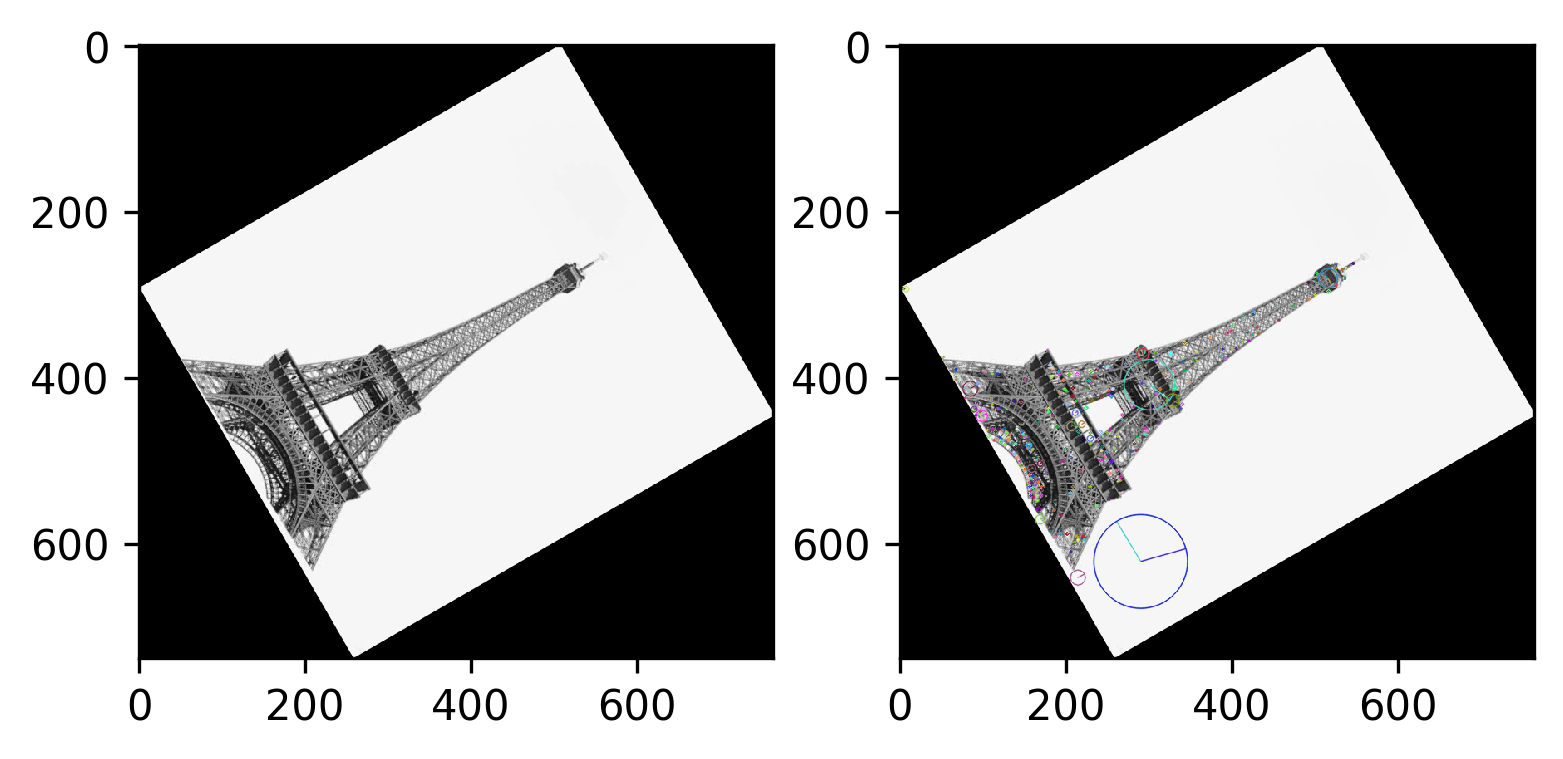

In [20]:
img_eiffel_gray_60 = imutils.rotate_bound(img_eiffel_gray, 60)
kp_eiffel_60, desc_eiffel_60 = sift.detector.detectAndCompute(img_eiffel_gray_60, None)
fig, axes = plt.subplots(1,2)
axes[0].imshow(img_eiffel_gray_60, cmap='gray', vmin=0, vmax=255)
img_eiffel_60_keypoints = cv2.drawKeypoints(img_eiffel_gray_60, kp_eiffel_60, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

axes[1].imshow(img_eiffel_60_keypoints)

cv2.imwrite("task1_rotated_keypoints.jpg", img_eiffel_60_keypoints)
print(len(kp_eiffel_60), "features detected")

## Task 3

In [21]:
def match_rotated_sift_features(image, rotation, detector):
    
    #rotate image
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    keypoints_orig, descriptors_orig = detector.detectAndCompute(img_gray, None)
    rotated_img = imutils.rotate_bound(img_gray, rotation)
    
    #get rotated image's keypoints
    keypoints_rot, descriptors_rot = detector.detectAndCompute(rotated_img, None)
    img_with_keypoints = cv2.drawKeypoints(rotated_img, keypoints_rot, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    
    #create a BFMatcher
    bf = cv2.BFMatcher()
    matches = bf.match(descriptors_orig, descriptors_rot)
    matches = sorted(matches, key = lambda x:x.distance)
    
    img_matched = cv2.drawMatches(img_gray, keypoints_orig, rotated_img, keypoints_rot, matches[:30], None, flags=2)
    
    return img_matched

In [30]:
params={}
params["n_octave_layers"]=3
params["contrast_threshold"]=0.2
params["edge_threshold"]=10
params["sigma"]=1.6
params["n_features"]=30

sift = SiftDetector(params=params)

img_stopsign = cv2.imread("img/road_sign.jpg")
matched_orig_0 = match_rotated_sift_features(img_stopsign, 0, orig_sift.detector)
matched_orig_45 = match_rotated_sift_features(img_stopsign, 45, orig_sift.detector)
matched_orig_90 = match_rotated_sift_features(img_stopsign, 90, orig_sift.detector)

matched_0 = match_rotated_sift_features(img_stopsign, 0, sift.detector)
matched_45 = match_rotated_sift_features(img_stopsign, 45, sift.detector)
matched_90 = match_rotated_sift_features(img_stopsign, 90, sift.detector)

True

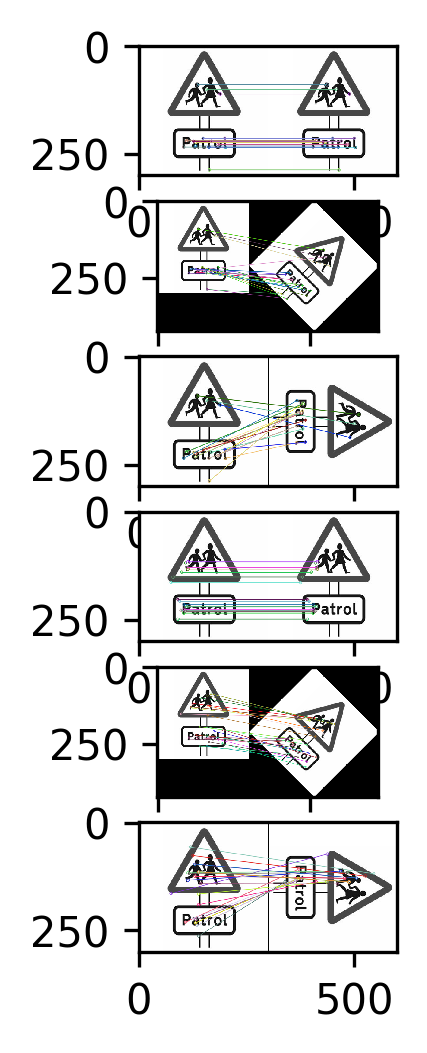

In [31]:
fig, axes = plt.subplots(6,1)
axes[0].imshow(matched_0)
axes[1].imshow(matched_45)
axes[2].imshow(matched_90)
axes[3].imshow(matched_orig_0)
axes[4].imshow(matched_orig_45)
axes[5].imshow(matched_orig_90)

cv2.imwrite("matched_0.jpg", matched_0)
cv2.imwrite("matched_45.jpg", matched_45)
cv2.imwrite("matched_90.jpg", matched_90)